# Lending Club Case Study

##### This case study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

##### Borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

##### To analyse this we have the complete loan data for all loans issued through the time period 2007 to 2011 and its Data Dictionary. 

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read data

In [2]:
# Read Data dictionary
DataDict = pd.read_excel("Data_Dictionary.xlsx")
DataDict.shape

(117, 2)

In [3]:
# Read Loan data
LoanDf = pd.read_csv("loan.csv", low_memory=False)
LoanDf.shape

(39717, 111)

##### Displaying first five records

In [4]:
LoanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### Get the information about each columns of the dataframe

In [5]:
LoanDf.info(verbose=True,show_counts=True)

# Observation
# We see that there are many columns with complete null values like "tot_coll_amt", "tot_cur_bal" etc
# We also see that there are three types of columns
# 1. Demographic variables like "emp_length", "annual_inc" etc
# 2. Loan characteristics variables like "int_rate", "loan_status" etc
# 3. Customer behavior variables like "total_acc", "total_pymnt" etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### 3. Data cleaning

##### Find columns which has only null values and drop them

In [6]:
col_with_no_val = list(LoanDf.columns[LoanDf.isnull().all()])
print("Number of columns which has no values = ",len(col_with_no_val))
print("Columns with Null values \n",col_with_no_val)

LoanDf.drop(columns=col_with_no_val, inplace=True)
print(LoanDf.shape)

Number of columns which has no values =  54
Columns with Null values 
 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_c

##### Find the percentage of null values in each column

In [43]:
LoanDf.isna().sum() / LoanDf.shape[0] * 100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
o

##### Find columns with more than 90% null values and drop them

In [8]:
col_with_90_per_no_val = list(LoanDf.columns[LoanDf.isnull().sum() / len(LoanDf) * 100 > 90])
print(DataDict[DataDict["LoanStatNew"].isin(col_with_90_per_no_val)])

LoanDf.drop(columns=col_with_90_per_no_val, inplace=True)
print(LoanDf.shape)

               LoanStatNew                                        Description
52  mths_since_last_record  The number of months since the last public rec...
58            next_pymnt_d                        Next scheduled payment date
(39717, 55)


##### Drop columns with Customer Behaviour variables

##### Drop additional columns which do not add value to our analysis

In [9]:
# Column "pymnt_plan"
LoanDf["pymnt_plan"].value_counts()

# It has only one value i.e "n". Hence it can be dropped
LoanDf.drop(columns="pymnt_plan", inplace=True)
LoanDf.shape

(39717, 54)

In [10]:
# Column "url"
LoanDf["url"].head()

# It does not have any valuable information for our analysis. Hence can be dropped
LoanDf.drop(columns="url", inplace=True)
LoanDf.shape

(39717, 53)

In [11]:
# Column "collections_12_mths_ex_med"
LoanDf["collections_12_mths_ex_med"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="collections_12_mths_ex_med", inplace=True)
LoanDf.shape

(39717, 52)

In [12]:
# Column "acc_now_delinq"
LoanDf["acc_now_delinq"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="acc_now_delinq", inplace=True)
LoanDf.shape

(39717, 51)

In [13]:
# Column "chargeoff_within_12_mths"
LoanDf["chargeoff_within_12_mths"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="chargeoff_within_12_mths", inplace=True)
LoanDf.shape

(39717, 50)

In [14]:
# Column "delinq_amnt"
LoanDf["delinq_amnt"].value_counts()

# It has only value "0". Hence it can be dropped
LoanDf.drop(columns="delinq_amnt", inplace=True)
LoanDf.shape

(39717, 49)

In [15]:
# Column "tax_liens"
LoanDf["tax_liens"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="tax_liens", inplace=True)
LoanDf.shape

(39717, 48)

##### Fill partial missing values using business judgement

In [16]:
# Determine which all columns have Null values
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [17]:
# Find number of empty values in column "emp_length"
LoanDf["emp_length"].isnull().sum()

1075

In [18]:
# Find values in in column "emp_length"
LoanDf["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [48]:
# Our assumption of emp_length being Null is that may be these borrowers are unemployed.
# Hence we will be replacing the Nulls with zero years
LoanDf["emp_length"].fillna("0 years",inplace=True)
LoanDf["emp_length"].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int32

In [49]:
# Find number of empty values in column "pub_rec_bankruptcies"
LoanDf["pub_rec_bankruptcies"].isnull().sum()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [21]:
# Find values in in column "pub_rec_bankruptcies"
LoanDf["pub_rec_bankruptcies"].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [50]:
# Majority of values is "0". Hence we will be replacing the Nulls with "0"
LoanDf["pub_rec_bankruptcies"].fillna(0,inplace=True)
LoanDf["pub_rec_bankruptcies"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec_bankruptcies, dtype: float64

##### Convert incorrect data types of columns

In [23]:
# Convert the column "term" to int by removing the suffix "months"
LoanDf["term"] = LoanDf.term.apply(lambda x: x.rstrip("months")).astype("int")
LoanDf["term"].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [24]:
# Convert the column "int_rate" to float by removing the suffix "%""
LoanDf["int_rate"] = LoanDf.int_rate.apply(lambda x: x.rstrip("%")).astype("float")
LoanDf["int_rate"].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [25]:
# Convert the column "emp_length" to int by removing the suffix "+ years" and prefix "<"
LoanDf["emp_length"] = LoanDf["emp_length"].apply(lambda x: x.rstrip("+ years").lstrip("<")).astype("int")
LoanDf["emp_length"].describe()

count    39717.000000
mean         4.954226
std          3.461960
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

### Remove outliers

### Derived Metrics

In [26]:
# Column "issue_d" is a date column which can be splitted into month and year
LoanDf["issue_d"] = pd.to_datetime(LoanDf["issue_d"],format="%b-%y")
LoanDf["issue_m"] = LoanDf['issue_d'].dt.month_name().str[:3]
LoanDf["issue_y"] = LoanDf['issue_d'].dt.year

LoanDf[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,Dec,2011
1,2011-12-01,Dec,2011
2,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
4,2011-12-01,Dec,2011


### 4. Sanity Check

In [27]:
# Funded amount or Funded amount investment should not be greater than Loan amount

LoanDf[(LoanDf["funded_amnt"] > LoanDf["loan_amnt"]) | (LoanDf["funded_amnt_inv"] > LoanDf["loan_amnt"])]

# Observation
# There are no such records

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,issue_m,issue_y


In [28]:
# Interest rate should not have any negative, zero or extremely high values

LoanDf["int_rate"].describe()

# Observation
# The min interest rate is 5.42% and max interest rate is 24.59 which looks legitimate

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [29]:
# Installment should not be greater than loan amount

LoanDf[LoanDf["installment"] > LoanDf["loan_amnt"]]

# Observation
# There are no such records

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,issue_m,issue_y


### 5. Univariate Analysis

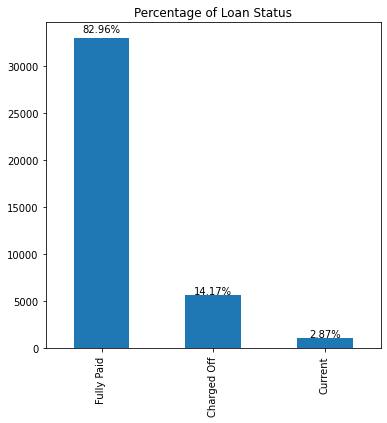

In [30]:
# Determine the percentage of loans that have been charged off

plt.title("Percentage of Loan Status")
ax = LoanDf["loan_status"].value_counts().plot.bar(figsize=[6,6])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height/len(LoanDf["loan_status"])*100, 2)}%', xy=(x + width/2, y + height*1.02), ha='center')
plt.show()

# Observation
# 14.17% of loans have been charged off

##### Segmented Univariate Analysis

In [31]:
# Create a data segment containing only Charged-off loans
chargedOffLoanDF = LoanDf[LoanDf["loan_status"]=="Charged Off"]
chargedOffLoanDF.shape

(5627, 50)

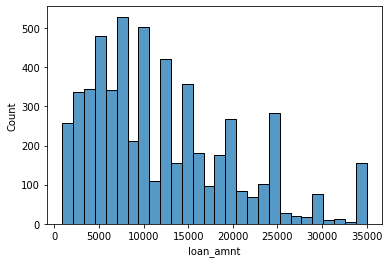

10000    362
12000    303
5000     287
15000    259
25000    252
        ... 
15775      1
19475      1
4475       1
27200      1
3175       1
Name: loan_amnt, Length: 487, dtype: int64

In [32]:
# Distribution of Loan Amount among Charged-off category
sns.histplot(chargedOffLoanDF["loan_amnt"])
plt.show()

chargedOffLoanDF["loan_amnt"].value_counts(ascending=False)

# Observation
# Most of the charged-off loans are within loan amount 25000
# There are spikes for loan amount like 5000, 10000, 12000, 15000 etc as people generally take loan of rounded amount

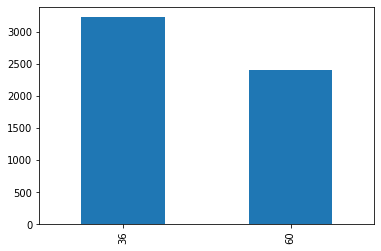

In [33]:
# Distribution of term among Charged-off category
chargedOffLoanDF["term"].value_counts().plot.bar()
plt.show()

# Observation
# The "term" do not have much influence on Charged-off loans

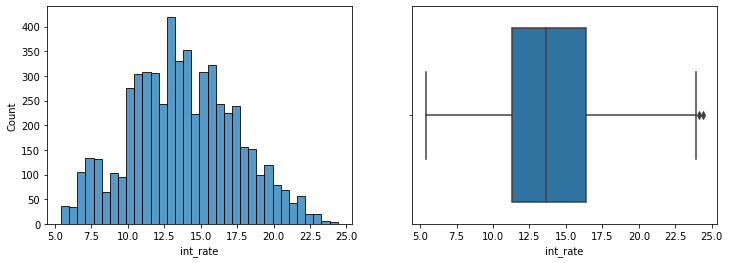

In [34]:
# Distribution of Interest Rate among Charged-off category
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.histplot(chargedOffLoanDF["int_rate"])

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="int_rate")
plt.show()

# Observation
# Majority of Interest Rate falls between 11% - 17% for an charged-off Loan

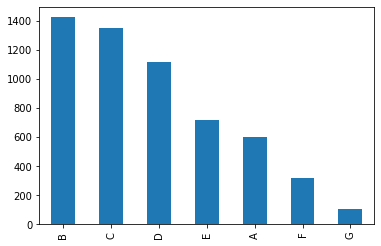

In [35]:
# Distribution of Grade among Charged-off category
chargedOffLoanDF["grade"].value_counts().plot.bar()
plt.show()

# Observation
# customers with grade B, C and D are likely to default

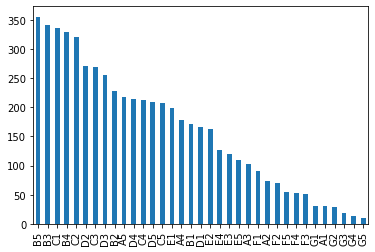

In [36]:
# Distribution of Sub-Grade among Charged-off category
chargedOffLoanDF["sub_grade"].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

# Observation
# customers with sub-grade of B, C and D are likely to default

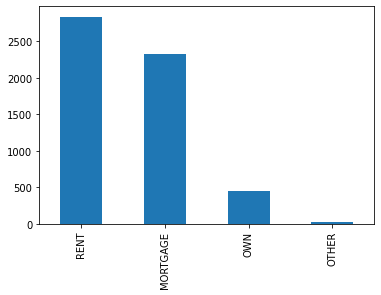

In [37]:
# Distribution of Home-ownership among Charged-off category
chargedOffLoanDF["home_ownership"].value_counts().plot.bar()
plt.show()

# Observation
# People with Rented or Mortgage house are likely to default

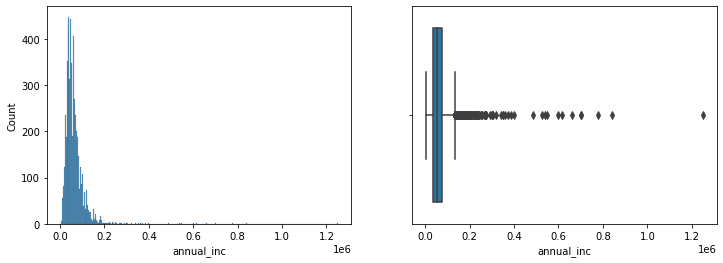

Range of annual income of charged-off people is between -20000.0 - 132000.0


In [38]:
# Distribution of Annual income among Charged-off category

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.histplot(chargedOffLoanDF["annual_inc"])

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="annual_inc")
plt.show()

IQR = chargedOffLoanDF["annual_inc"].quantile(0.75) - chargedOffLoanDF["annual_inc"].quantile(0.25)
max = chargedOffLoanDF["annual_inc"].quantile(0.75) + 1.5 * IQR
min = chargedOffLoanDF["annual_inc"].quantile(0.25) - 1.5 * IQR

print("Range of annual income of charged-off people is between {} - {}".format(min, max))

# Observation 
# Almost all charged_off loans have annual income towards lower limit

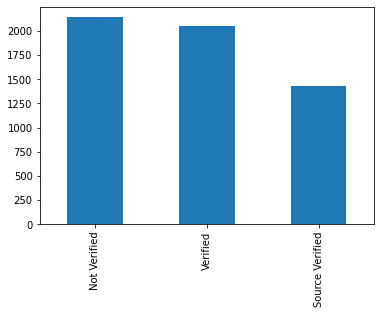

In [39]:
# Distribution of Verification status among Charged-off category

chargedOffLoanDF["verification_status"].value_counts().plot.bar()
plt.show()

# Observation
# This do not have any influence on Charged-off loans

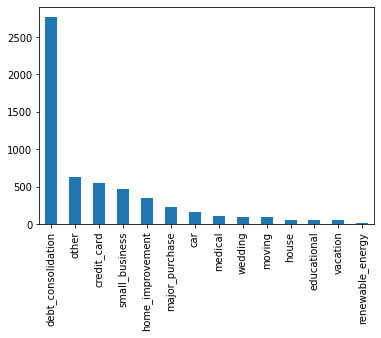

In [40]:
# Distribution of Purpose among Charged-off category

chargedOffLoanDF["purpose"].value_counts().plot.bar()
plt.show()

# Observation
# People taking loan with 'Debt-consolidation' perpose are likely to default

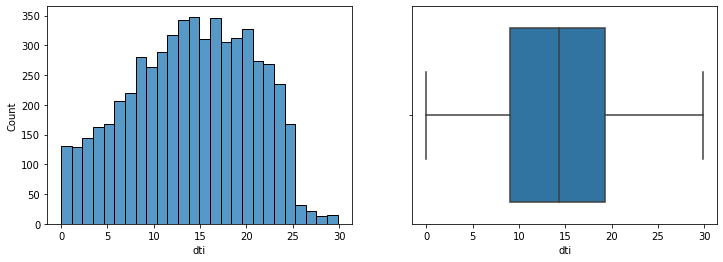

In [41]:
# Distribution of dti among Charged-off category

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.histplot(chargedOffLoanDF["dti"])

plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="dti")
plt.show()

# Observation
# people with dti between 10-20 are likely to default

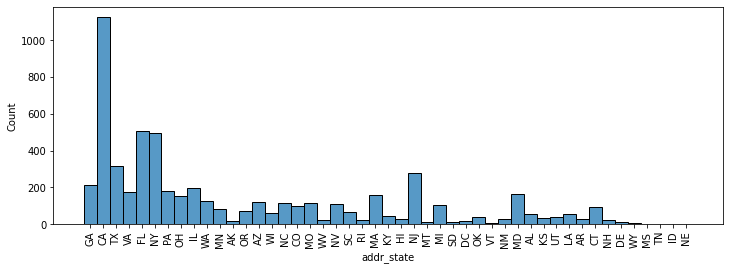

In [42]:
# Distribution of Address State among Charged-off category
plt.figure(figsize=[12,4])
sns.histplot(chargedOffLoanDF["addr_state"])
plt.xticks(rotation=90)
plt.show()

# Observation
# people living in CA are likely to default